In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


distutils: C:\Users\USER\anaconda3\Include\UNKNOWN
sysconfig: C:\Users\USER\anaconda3\Include
user = False
home = None
root = None
prefix = None
distutils: C:\Users\USER\anaconda3\Include\UNKNOWN
sysconfig: C:\Users\USER\anaconda3\Include
user = False
home = None
root = None
prefix = None


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


distutils: C:\Users\USER\anaconda3\Include\UNKNOWN
sysconfig: C:\Users\USER\anaconda3\Include
user = False
home = None
root = None
prefix = None
distutils: C:\Users\USER\anaconda3\Include\UNKNOWN
sysconfig: C:\Users\USER\anaconda3\Include
user = False
home = None
root = None
prefix = None


In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
#re-size all the images to 224, 224
IMAGE_SIZE=[224, 224]
train_path = 'datasets/train'
valid_path = 'datasets/test'

In [5]:
#import the ResNet 50 library as shown below and adding
#preprocessing layer to the front of resnett50
#here we will be suing imagenet weights
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top = False)

In [6]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [7]:
# do'nt train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [8]:
#useful for gettig number of output classes
folders = glob('datasets/train/*')

In [9]:
folders

['datasets/train\\audi',
 'datasets/train\\lamborghini',
 'datasets/train\\mercedes']

In [10]:
x= Flatten()(resnet.output)

In [11]:
prediction = Dense(len(folders), activation ='softmax')(x)
model = Model(inputs=resnet.input, outputs=prediction)

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [13]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics =['accuracy'])

In [14]:
##use the Image Data Generator to import from the dataset

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen =ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip =True)

test_datagen =ImageDataGenerator(rescale=1./255)

In [15]:
#make sure you provide the same target size as initialized 
#for the image size
training_set = train_datagen.flow_from_directory('datasets/train',
                                                target_size =(224,224),
                                                batch_size =32,
                                                class_mode ='categorical')

Found 64 images belonging to 3 classes.


In [16]:
test_set = test_datagen.flow_from_directory('datasets/test',
                                      target_size =(224,224),
                                      batch_size =32,
                                      class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [17]:
#fit the model
#Run the cell. It will take some time
r = model.fit_generator(training_set,
                       validation_data=test_set,
                       epochs=50,
                       steps_per_epoch =len(training_set),
                       validation_steps=len(test_set))

C:\Users\USER\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 32s 19s/step - loss: 4.1211 - accuracy: 0.2917 - val_loss: 18.1730 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 21s 14s/step - loss: 12.8896 - accuracy: 0.3958 - val_loss: 10.7962 - val_accuracy: 0.3448
Epoch 3/50
2/2 [==============================] - 24s 19s/step - loss: 6.7203 - accuracy: 0.5104 - val_loss: 7.8405 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 23s 14s/step - loss: 3.8821 - accuracy: 0.4271 - val_loss: 3.6285 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 20s 14s/step - loss: 4.6569 - accuracy: 0.3646 - val_loss: 3.2823 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 20s 14s/step - loss: 5.4168 - accuracy: 0.3646 - val_loss: 3.1199 - val_accuracy: 0.3276
Epoch 7/50
2/2 [==============================] - 19s 13s/step - loss: 3.5306 - accuracy: 0.4271 - val_loss: 1.4244 - val_accuracy: 0.5690
Epoch 8/50
2/2 [========

In [18]:
r

In [19]:
r.history

{'loss': [5.061644554138184,
  12.37531566619873,
  7.620208263397217,
  3.3752763271331787,
  4.860227108001709,
  4.934750556945801,
  2.876525402069092,
  1.8873116970062256,
  2.5953783988952637,
  1.1366007328033447,
  1.5612411499023438,
  1.138782024383545,
  1.1297876834869385,
  1.2350294589996338,
  0.6459260582923889,
  0.9652037620544434,
  0.7034693956375122,
  0.9266175031661987,
  0.5447648763656616,
  0.6838352084159851,
  0.48663219809532166,
  0.5409523248672485,
  0.44700926542282104,
  0.4145645201206207,
  0.4629802703857422,
  0.422963947057724,
  0.3664063811302185,
  0.36847537755966187,
  0.3589283525943756,
  0.3282043933868408,
  0.35527274012565613,
  0.32563135027885437,
  0.2878406345844269,
  0.3353245258331299,
  0.261173278093338,
  0.23408862948417664,
  0.2598600387573242,
  0.24809497594833374,
  0.25338447093963623,
  0.23956778645515442,
  0.2758120596408844,
  0.20429831743240356,
  0.24851185083389282,
  0.27508842945098877,
  0.23606419563293457

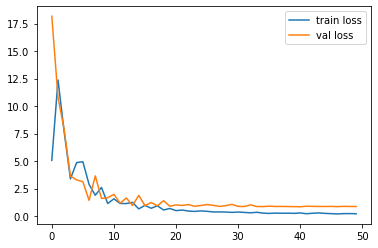

In [20]:
#plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.savefig('LossVal_loss')


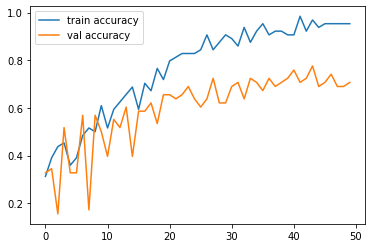

In [21]:
#plot the accuracy
plt.plot(r.history['accuracy'], label ='train accuracy')
plt.plot(r.history['val_accuracy'], label ='val accuracy')
plt.legend()
plt.savefig('AccuracyVal_accuracy')

In [22]:
## save the model as a h5 file
from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

In [23]:
y_pred = model.predict(test_set)
y_pred

array([[7.9177141e-02, 6.9871688e-01, 2.2210598e-01],
       [8.5377550e-01, 1.0960735e-01, 3.6617141e-02],
       [2.9197913e-02, 3.8612008e-01, 5.8468205e-01],
       [1.8602027e-02, 9.3143708e-01, 4.9960896e-02],
       [3.7031436e-01, 1.3561505e-01, 4.9407065e-01],
       [2.7311884e-02, 8.0288988e-01, 1.6979827e-01],
       [6.0406800e-02, 1.9799054e-02, 9.1979414e-01],
       [9.1283627e-02, 1.3612685e-01, 7.7258956e-01],
       [7.3281384e-01, 2.6066673e-01, 6.5194005e-03],
       [1.0028769e-02, 9.2403978e-01, 6.5931417e-02],
       [1.6770363e-02, 9.8180860e-01, 1.4209790e-03],
       [1.2937634e-02, 5.9863979e-01, 3.8842258e-01],
       [1.0523568e-01, 2.4652843e-01, 6.4823592e-01],
       [2.9227363e-02, 4.9969912e-01, 4.7107354e-01],
       [2.0682106e-02, 9.2862731e-01, 5.0690547e-02],
       [6.5692875e-06, 5.8704539e-04, 9.9940634e-01],
       [4.4306754e-03, 3.5047788e-02, 9.6052152e-01],
       [5.2291530e-01, 3.6351436e-01, 1.1357035e-01],
       [9.3974346e-01, 3.440

In [24]:
import numpy as np
y_pred = np.argmax(y_pred, axis =1)

In [25]:
y_pred

array([1, 0, 2, 1, 2, 1, 2, 2, 0, 1, 1, 1, 2, 1, 1, 2, 2, 0, 0, 1, 2, 2,
       2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 0, 2, 2, 2, 1, 1, 0,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2], dtype=int64)

In [26]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [27]:
model =load_model('model_resnet50.h5')

In [28]:
img = image.load_img('C:/Users/USER\Desktop/Portfolio Projects/datasets/test/lamborghini/10.jpg',
                    target_size =(224,224))

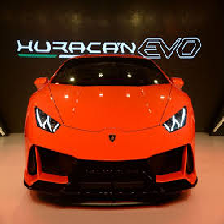

In [29]:
img

In [30]:
x=image.img_to_array(img)
x

array([[[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        ...,
        [ 13.,   2.,   0.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 18.,   8.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 18.,   8.,   0.],
        [ 18.,   8.,   0.],
        [ 19.,   9.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       ...,

       [[209., 129.,  92.],
        [210., 130.,  93.],
        [212., 132.,  95.],
        ...,
        [216., 132.,  96.],
        [214., 129.,  92.],
        [213., 129.,  92.]],

       [[208., 128.,  91.],
        [208., 128.,  91.],
        [211., 131.,  94.],
        ...,
        [215., 131.,  95.],
        [209., 129.,  94.],
        [207., 129.,  93.]],

       [[206., 128.,  90.],
        [206., 128.,  90.],
        [209., 1

In [31]:
x.shape

(224, 224, 3)

In [32]:
x=x/255

In [33]:
x

array([[[0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        ...,
        [0.05098039, 0.00784314, 0.        ],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       [[0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.05490196, 0.01176471, 0.00392157],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       [[0.07058824, 0.03137255, 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        [0.07450981, 0.03529412, 0.        ],
        ...,
        [0.05490196, 0.01176471, 0.00392157],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       ...,

       [[0.81960785, 0.5058824 , 0.36078432],
        [0.8235294 , 0.50980395, 0.3647059 ],
        [0.83137256, 0

In [34]:
x=np.expand_dims(x,axis=0)
x

array([[[[0.06666667, 0.02745098, 0.        ],
         [0.06666667, 0.02745098, 0.        ],
         [0.06666667, 0.02745098, 0.        ],
         ...,
         [0.05098039, 0.00784314, 0.        ],
         [0.05490196, 0.01568628, 0.01176471],
         [0.05490196, 0.01568628, 0.01176471]],

        [[0.06666667, 0.02745098, 0.        ],
         [0.06666667, 0.02745098, 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.05490196, 0.01176471, 0.00392157],
         [0.05490196, 0.01568628, 0.01176471],
         [0.05490196, 0.01568628, 0.01176471]],

        [[0.07058824, 0.03137255, 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         [0.07450981, 0.03529412, 0.        ],
         ...,
         [0.05490196, 0.01176471, 0.00392157],
         [0.05490196, 0.01568628, 0.01176471],
         [0.05490196, 0.01568628, 0.01176471]],

        ...,

        [[0.81960785, 0.5058824 , 0.36078432],
         [0.8235294 , 0.50980395, 0.3647059 ]

In [35]:
from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions

In [36]:
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [37]:
model.predict(img_data)

array([[0.00668471, 0.414359  , 0.57895625]], dtype=float32)

In [38]:
a =np.argmax(model.predict(img_data), axis=1)

In [39]:
a

array([2], dtype=int64)

In [40]:
a==1

array([False])